# Virtual Competition 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Train data

In [2]:
# Loading train data

train_data = pd.read_csv("loan_traindata.csv")

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.shape

(614, 13)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Checking null values in the train data

train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* Handling Missing values in Train data

In [8]:
# Handling missing values in Gender column

gender = train_data["Gender"]
gender.mode()[0]

train_data["Gender"].fillna(gender.mode()[0], inplace=True)

In [9]:
# Handling missing values in Married column

train_data["Married"].fillna(train_data["Married"].mode()[0], inplace = True)

In [10]:
# Handling missing values in Self employed column
se = train_data["Self_Employed"].mode()[0]
se
train_data["Self_Employed"].fillna(se, inplace = True)

In [11]:
# Handling missing values in Loan amount column

lm = train_data["LoanAmount"].mean()

train_data["LoanAmount"].fillna(lm, inplace = True)

In [12]:
# Handling missing values in Loan Amount term column

train_data["Loan_Amount_Term"].fillna(train_data["Loan_Amount_Term"].mean(), inplace = True)

In [13]:
# Handling missing values in Credict history column

train_data["Credit_History"] = train_data["Credit_History"].fillna(train_data["Credit_History"].mode()[0])

In [14]:
# Handling missing values in Dependences column

train_data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
# Replacing 3+ with 3 which represents dependents are more than 3

train_data["Dependents"] = train_data["Dependents"].replace("3+",3)

In [16]:
train_data["Dependents"] = pd.to_numeric(train_data["Dependents"])

train_data["Dependents"] = train_data["Dependents"].fillna(train_data["Dependents"].mode()[0])

In [17]:
train_data["Dependents"].value_counts()

0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [18]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [20]:
#duplicated values

train_data.duplicated().sum()

0

## TEST data

In [21]:
# Loading Test data

test_data = pd.read_csv("loan_testdata.csv")

In [22]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [23]:
test_data.shape

(367, 12)

In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [25]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [26]:
# Checking null values in Test data

test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [27]:
test_data["Gender"].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

* Handling missing values in Test data

In [28]:
# Handling missing values in Gender column

test_data["Gender"] = test_data["Gender"].fillna(test_data["Gender"].mode()[0])

In [29]:
# Handling missing values in Dependents column
# Replacing 3+ with 3 which represents dependents are more than 3

test_data["Dependents"].replace("3+",3, inplace=True)

In [30]:
test_data["Dependents"] = pd.to_numeric(test_data["Dependents"])

test_data["Dependents"] = test_data["Dependents"].fillna(test_data["Dependents"].mode()[0])

In [31]:
# Handling missing values in Self_emplyoed column

test_data["Self_Employed"] = test_data["Self_Employed"].fillna(test_data["Self_Employed"].mode()[0])

In [32]:
# Handling missing values in Loan amount column

test_data["LoanAmount"] = test_data["LoanAmount"].fillna(test_data["LoanAmount"].mean())

In [33]:
# Handling missing values in Loan amount term column

test_data["Loan_Amount_Term"] = test_data["Loan_Amount_Term"].fillna(test_data["Loan_Amount_Term"].mean())

In [34]:
# Handling missing values in Credit History column

test_data["Credit_History"] = test_data["Credit_History"].fillna(test_data["Credit_History"].mode()[0])

In [35]:
#duplicates

test_data.duplicated().sum()

0

### EDA on Train data

In [36]:
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


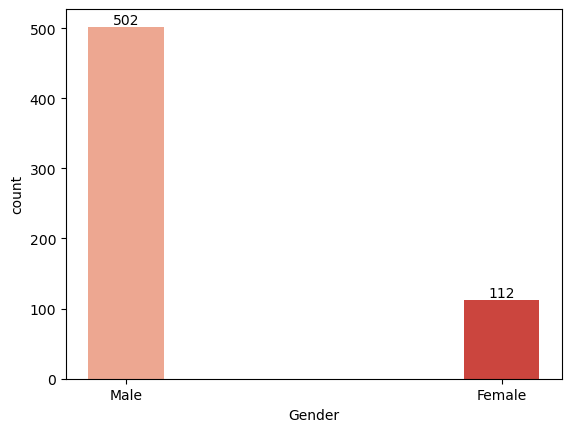

In [37]:
# Number of male and female applied for loan

ax = sns.countplot(data = train_data, x = "Gender", palette = "Reds", width=0.2)
ax.bar_label(ax.containers[0])
ax.plot()
plt.show()

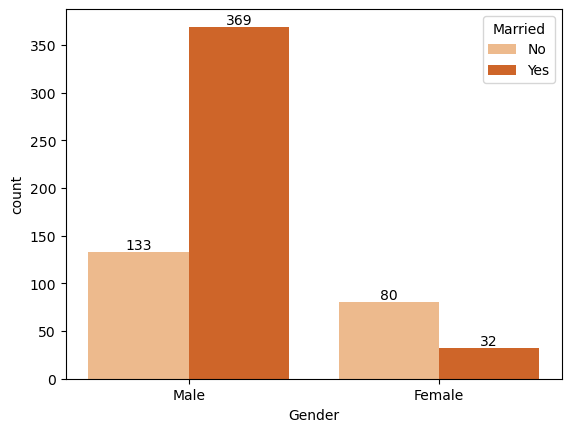

In [38]:
#Number of male and female applicants who are married and unmarried

ax = sns.countplot(data = train_data, x = "Gender", palette = "Oranges", hue = "Married")

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.plot()
plt.show()

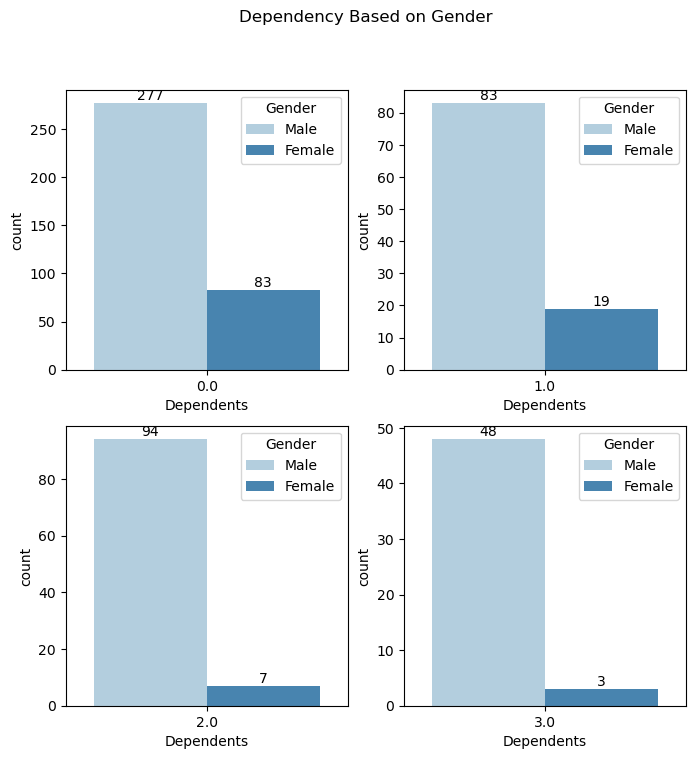

In [39]:
# Dependency Based on Gender

plt.figure(figsize=(8,8))

plt.suptitle("Dependency Based on Gender")

plt.subplot(2,2,1)
dep = train_data[train_data["Dependents"] == 0]
ax = sns.countplot(data = dep, x="Dependents", hue = "Gender", palette="Blues")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


plt.subplot(2,2,2)
dep = train_data[train_data["Dependents"] == 1]
ax = sns.countplot(data = dep, x="Dependents", hue = "Gender", palette="Blues")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


plt.subplot(2,2,3)
dep = train_data[train_data["Dependents"] == 2]
ax = sns.countplot(data = dep, x="Dependents", hue = "Gender", palette="Blues")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.subplot(2,2,4)
dep = train_data[train_data["Dependents"] == 3]
ax = sns.countplot(data = dep, x="Dependents", hue = "Gender", palette="Blues")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


plt.show()

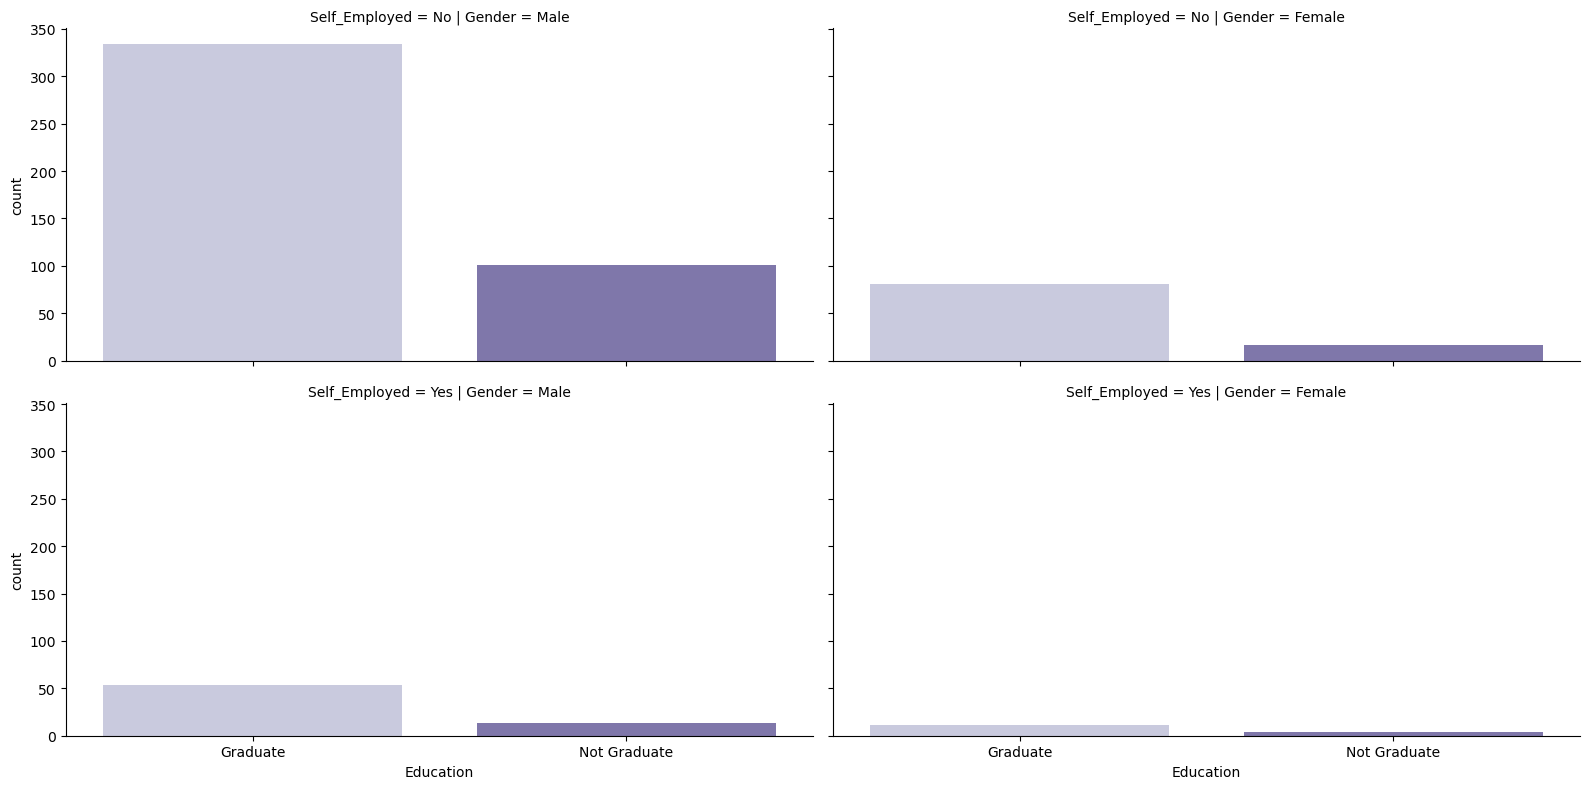

In [40]:
# Male and Female applicants with their education and self_employment status 

sns.catplot(data = train_data ,x = "Education", kind="count",col="Gender", row = "Self_Employed" , height=4, aspect=2, palette="Purples")

plt.show()

In [41]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


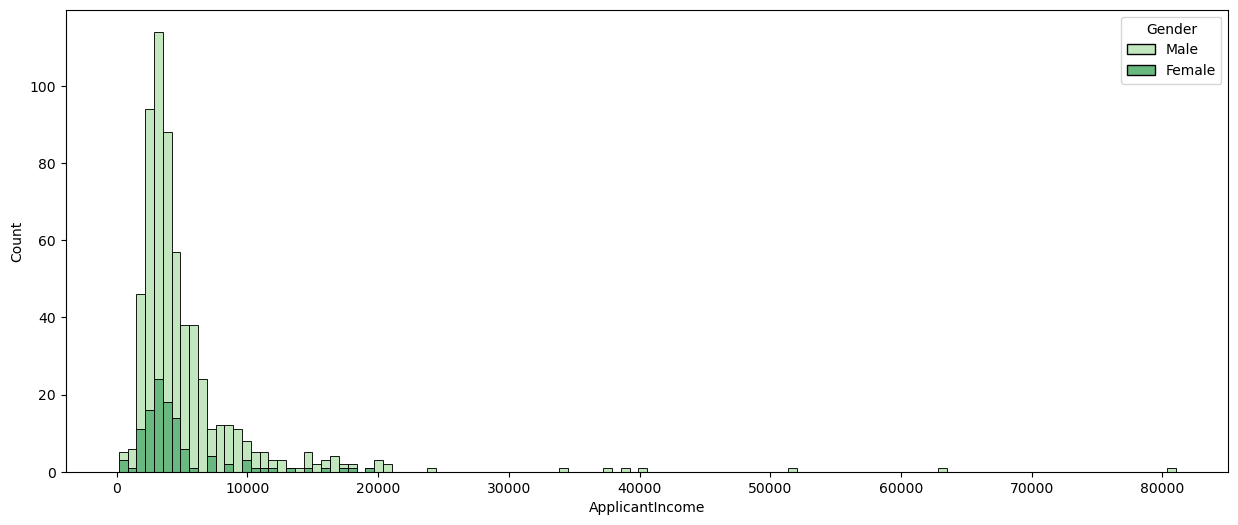

In [42]:
# Representation of Applicant Income 

plt.figure(figsize=(15,6))
sns.histplot(data= train_data, x="ApplicantIncome", bins=120, hue="Gender", palette="Greens", multiple="stack")

plt.show()

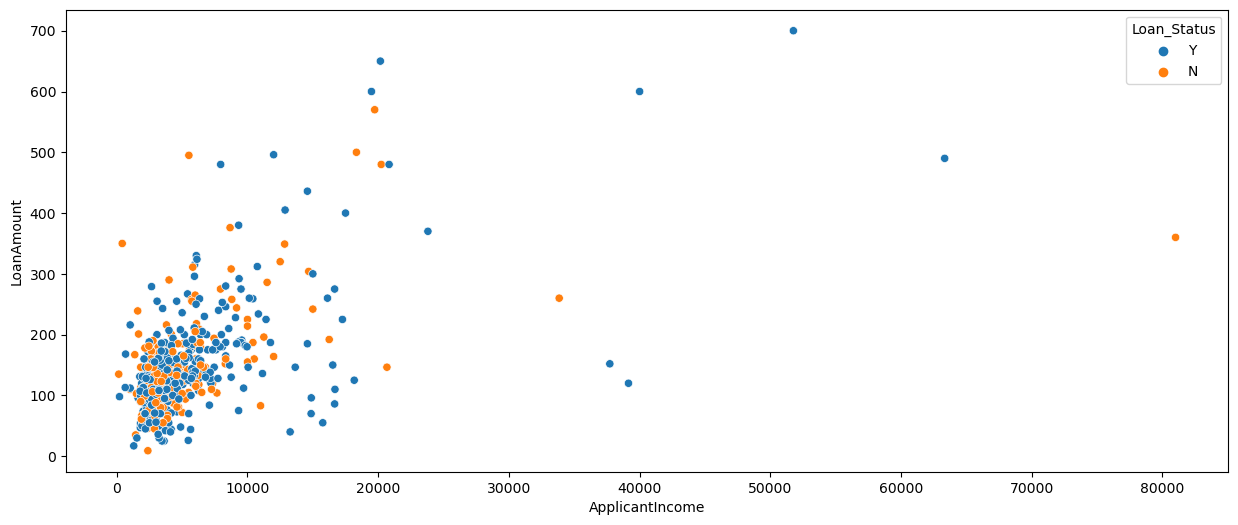

In [43]:
# Approvel of Loan, considering Applicants income and ther loan amount

plt.figure(figsize=(15,6))
sns.scatterplot(x=train_data["ApplicantIncome"], y=train_data["LoanAmount"], hue = train_data["Loan_Status"])

plt.show()

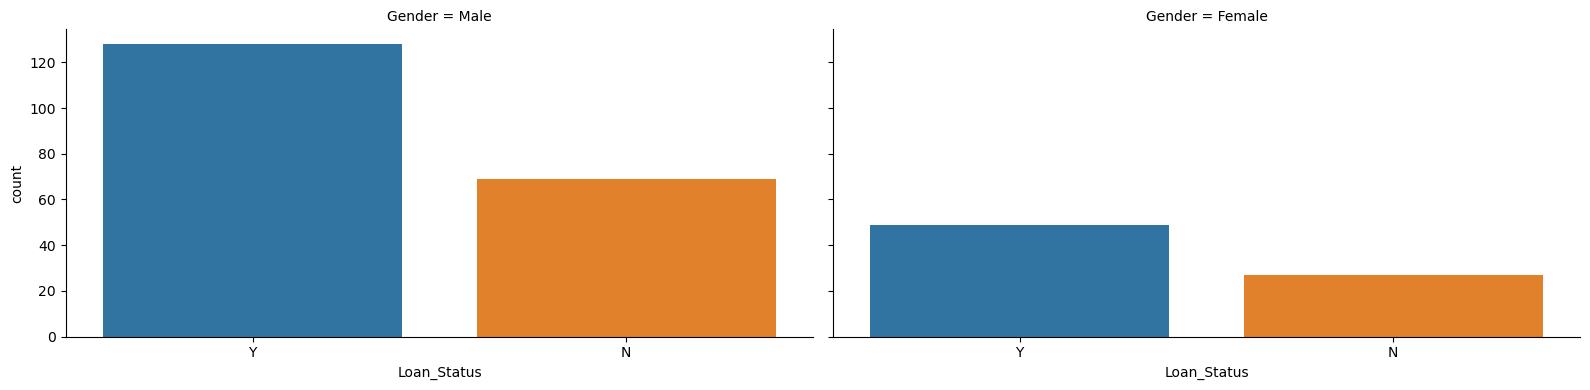

In [44]:
#Representaion of Loan approved applicants with there no coapplicant income

loan_co = train_data[train_data["CoapplicantIncome"] == 0]
sns.catplot(data = loan_co, x = "Loan_Status", kind="count", col="Gender", height=4, aspect=2)

C:\Users\Unni\AppData\Local\Temp\ipykernel_24296\94594416.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = train_data.corr(), annot = True)


<Axes: >

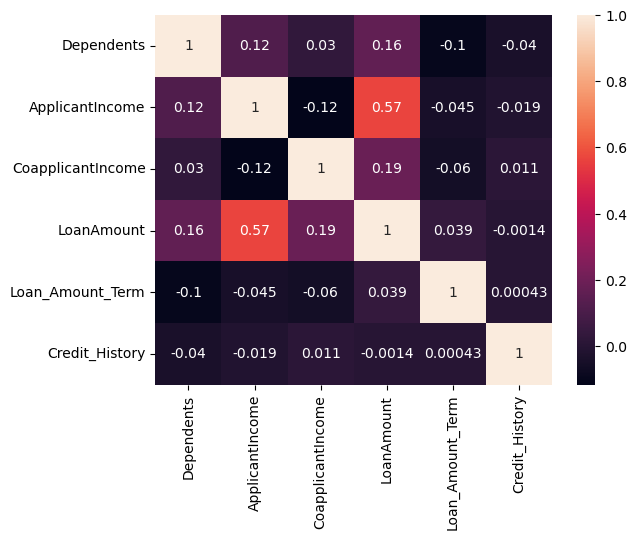

In [45]:
sns.heatmap(data = train_data.corr(), annot = True)

In [46]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### Preprocessing

* Encoding categorical values from Train data

In [47]:
# Encoding gender column  using Label encoder

encode_gender = train_data["Gender"]

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# fitting and transforming
encoded_gender = label_encoder.fit_transform(encode_gender)


# replcing gender column with the labelled data

train_data["Gender"] = encoded_gender

In [48]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,1,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [49]:
# Encoding Married column 

encoded_married = label_encoder.fit_transform(train_data["Married"])

train_data["Married"] = encoded_married

In [50]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,1,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,1,1,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,1,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,0,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [51]:
# Encoding Education column

encoded_education = label_encoder.fit_transform(train_data["Education"])

In [52]:
train_data["Education"] = encoded_education

In [53]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,1,1.0,0,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,1,1,0.0,0,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,1,0.0,1,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,0,0.0,0,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [54]:
# Encoding Self employed column

encoded_employ = label_encoder.fit_transform(train_data["Self_Employed"])

In [55]:
train_data["Self_Employed"] = encoded_employ

In [56]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [57]:
# Number of Y and N in the Loan_Status column

train_data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [58]:
# Encoding Property Area using Onehot encoder

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

encode_property = train_data["Property_Area"]
encode_property = encode_property.values.reshape(-1,1)

# fitting and transforming
encoded_property = onehot_encoder.fit_transform(encode_property).toarray()

In [59]:
area = pd.DataFrame(encoded_property, columns=onehot_encoder.get_feature_names_out(["Area"]))

In [60]:
area

,Area_Rural,Area_Semiurban,Area_Urban
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
609,1.0,0.0,0.0
610,1.0,0.0,0.0
611,0.0,0.0,1.0
612,0.0,0.0,1.0


In [61]:
# Combining Train data and encoded value

traindata_encoded = pd.concat([train_data, area],axis=1)

In [62]:
traindata_encoded.drop(columns="Property_Area", inplace=True)

In [63]:
train_data1 = traindata_encoded.copy()

In [64]:
# Encodeing Loan_status column

encoded_loanstatus = label_encoder.fit_transform(train_data1["Loan_Status"])

train_data1["Loan_Status"] = encoded_loanstatus

In [65]:
train_data1["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

* Scaling Train data

In [66]:
# Scaling using Standard Scalar

#feature and target variable
x = train_data1.drop(columns=["Loan_ID", "Loan_Status"])
y = train_data1["Loan_Status"]


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(x)

* Encoding datapoints in test data

In [67]:
# Encoding Gender column 

test_encode_gender = test_data["Gender"]

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

test_encoded_gender = label_encoder.fit_transform(test_encode_gender)


#replcing gender column with the labelled data

test_data["Gender"] = test_encoded_gender

In [68]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,1,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,1,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [69]:
# Encoding Married column in test data

test_encoded_married = label_encoder.fit_transform(test_data["Married"])

test_data["Married"] = test_encoded_married

In [70]:
# Encoding Education column in test data

test_encoded_edu = label_encoder.fit_transform(test_data["Education"])

test_data["Education"] = test_encoded_edu

In [71]:
# Encoding Self Employed column in test data

test_encoded_employ = label_encoder.fit_transform(test_data["Self_Employed"])

test_data["Self_Employed"] = test_encoded_employ

In [72]:
# Encoding Property_area in test data

test_encode_area = pd.get_dummies(test_data["Property_Area"])

In [73]:
test_encode_area

,Rural,Semiurban,Urban
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
362,0,0,1
363,0,0,1
364,0,1,0
365,1,0,0


In [74]:
# Combining Test data and encoded value

test_data = pd.concat([test_data, test_encode_area], axis = 1)

In [75]:
test_data.drop(columns="Property_Area", inplace=True)

In [76]:
test_data.rename({"Rural":"Area_Rural", "Semiurban":"Area_Semiurban", "Urban":"Area_Urban"}, inplace=True, axis=1)

In [77]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Area_Rural,Area_Semiurban,Area_Urban
0,LP001015,1,1,0.0,0,0,5720,0,110.0,360.0,1.0,0,0,1
1,LP001022,1,1,1.0,0,0,3076,1500,126.0,360.0,1.0,0,0,1
2,LP001031,1,1,2.0,0,0,5000,1800,208.0,360.0,1.0,0,0,1
3,LP001035,1,1,2.0,0,0,2340,2546,100.0,360.0,1.0,0,0,1
4,LP001051,1,0,0.0,1,0,3276,0,78.0,360.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3.0,1,1,4009,1777,113.0,360.0,1.0,0,0,1
363,LP002975,1,1,0.0,0,0,4158,709,115.0,360.0,1.0,0,0,1
364,LP002980,1,0,0.0,0,0,3250,1993,126.0,360.0,1.0,0,1,0
365,LP002986,1,1,0.0,0,0,5000,2393,158.0,360.0,1.0,1,0,0


In [78]:
test_data1 = test_data.copy()

In [79]:
test_data1.drop(columns="Loan_ID", inplace = True)

In [80]:
test_data1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Area_Rural,Area_Semiurban,Area_Urban
0,1,1,0.0,0,0,5720,0,110.0,360.0,1.0,0,0,1
1,1,1,1.0,0,0,3076,1500,126.0,360.0,1.0,0,0,1
2,1,1,2.0,0,0,5000,1800,208.0,360.0,1.0,0,0,1
3,1,1,2.0,0,0,2340,2546,100.0,360.0,1.0,0,0,1
4,1,0,0.0,1,0,3276,0,78.0,360.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3.0,1,1,4009,1777,113.0,360.0,1.0,0,0,1
363,1,1,0.0,0,0,4158,709,115.0,360.0,1.0,0,0,1
364,1,0,0.0,0,0,3250,1993,126.0,360.0,1.0,0,1,0
365,1,1,0.0,0,0,5000,2393,158.0,360.0,1.0,1,0,0


* Scaling Test data

In [81]:
# Importing and Initializing Standard scalar

from sklearn.preprocessing import StandardScaler
x1 = test_data1

scaler = StandardScaler()

x_test = scaler.fit_transform(x1)

In [82]:
# Assigning x_train and y_train for modeling

x_train = x
y_train = y


## Modeling

### KNN Classification model

In [83]:
# Importing and Initializing KNN classifier

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [84]:
## Model evaluation

from sklearn.metrics import accuracy_score
knn_predict_train = knn_model.predict(x_train)

print("Accuracy score on train data: ", accuracy_score(knn_predict_train, y_train))

Accuracy score on train data:  0.8306188925081434


In [85]:
# Model Predection

knn_predict = knn_model.predict(x_test)

In [86]:
knn_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [87]:
# Converting predicted value as "Y" and "N"

thershold = 1

binary_predict_knn = []

def binary_prediction(n):
    for i in n:
        if i == thershold:
            yes_value = "Y"
            binary_predict_knn.append(yes_value)
        else:
            no_value = "N"
            binary_predict_knn.append(no_value)

binary_prediction(knn_predict)

In [88]:
knn_loan_predict = pd.DataFrame(binary_predict_knn, columns=["Loan_Status"])

In [89]:
knn_loan_predict.shape

(367, 1)

In [90]:
knn_loan_predict["Loan_Status"].value_counts()

Y    299
N     68
Name: Loan_Status, dtype: int64

In [91]:
knn_predict.shape

(367,)

In [92]:
knn_loan_predict = pd.concat([test_data["Loan_ID"], knn_loan_predict], axis=1)
knn_loan_predict.set_index("Loan_ID", inplace=True)

In [93]:
#To csv file

knn_loan_predict.to_csv("E:\ict_dsa\loan data\knnloan_predict.csv")

#### Fine tuning KNN classifier

In [94]:
# Assigning Parameters for fine tuning

parameters ={"n_neighbors" : [3,5,6,7],
             "algorithm"  : ["auto", "ball_tree", "kd_tree", "brute"]
               }

In [95]:
# Importing and Initializing GridSearch

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(KNeighborsClassifier(),
                          parameters,
                          cv=5,
                          n_jobs=-1,
                          verbose=1)

In [96]:
grid_result = grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [97]:
print("Best Parameter ", grid_result.best_params_)
print("Best score ", grid_result.best_score_)

Best Parameter  {'algorithm': 'auto', 'n_neighbors': 7}
Best score  0.7948420631747302


In [98]:
# KNN classifier using finetuned parameters


knn_model_finetune = KNeighborsClassifier(algorithm = "auto", n_neighbors = 7)
knn_model_finetune.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [99]:
## Model evaluation

from sklearn.metrics import accuracy_score
knnft_predict_train = knn_model_finetune.predict(x_train)

print("Accuracy score on train data: ", accuracy_score(knnft_predict_train, y_train))

Accuracy score on train data:  0.8273615635179153


In [100]:
# Model Predection

knnft_predict = knn_model_finetune.predict(x_test)

In [101]:
knnft_predict.shape

(367,)

In [102]:
# Converting predicted value as "Y" and "N"

thershold = 1

binary_predict_knnft = []

def binary_predictionft(n):
    for i in n:
        if i == thershold:
            yes_value = "Y"
            binary_predict_knnft.append(yes_value)
        else:
            no_value = "N"
            binary_predict_knnft.append(no_value)

binary_predictionft(knnft_predict)

In [103]:
knnft_loan_predict = pd.DataFrame(binary_predict_knnft, columns=["Loan_Status"])

In [104]:
knnft_loan_predict["Loan_Status"].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In [105]:
knnft_loan_predict = pd.concat([test_data["Loan_ID"], knnft_loan_predict], axis=1)
knnft_loan_predict.set_index("Loan_ID", inplace=True)

In [106]:
#To csv file

knnft_loan_predict.to_csv("E:/ict_dsa/loan data/finetune/knnloan_predict_ft.csv")

### Decision Tree Classification

In [107]:
# Importing and Initializing Decision tree classifier

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [108]:
# Evaluation using training dataset

dt_predict = dt_model.predict(x_train)

print("Accuracy score on Decision tree: ", accuracy_score(dt_predict, y_train))

Accuracy score on Decision tree:  1.0


In [109]:
# Model Prediction

dr_predict = dt_model.predict(x_test)

In [110]:
dr_predict

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [111]:
# Converting predicted value as "Y" and "N"

binary_predict_dt = []

def dt_binarypredict(value_dt):
    for i in value_dt:
        if i == 1:
            yes_dt = "Y"
            binary_predict_dt.append(yes_dt)
        else:
            no_dt = "N"
            binary_predict_dt.append(no_dt)
            
dt_binarypredict(dr_predict)

In [112]:
# Converting to dataframe

Decisiont_loan_predict = pd.DataFrame(binary_predict_dt, columns=["Loan_Status"])

In [113]:
Decisiont_loan_predict["Loan_Status"].value_counts()

Y    211
N    156
Name: Loan_Status, dtype: int64

In [114]:
Decisiont_loan_predict = pd.concat([test_data["Loan_ID"], Decisiont_loan_predict], axis=1)

In [115]:
Decisiont_loan_predict.set_index("Loan_ID", inplace=True)

In [116]:
# To csv file

Decisiont_loan_predict.to_csv("E:\ict_dsa\loan data\decisiontloan_predict.csv")

#### Fine Tuning Decision tree Classifier

In [117]:
# Assigning Parameters for fine tuning

parameters ={"criterion"  : ["gini", "entropy", "log_loss"],
              "splitter" : ["best", "random"],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              "random_state" : [10,20,35,42,50,60,70,75,80]
               }

In [118]:
# Importing and Initializing GridSearch

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(DecisionTreeClassifier(),
                          parameters,
                          cv=5,
                          n_jobs=-1,
                          verbose=1)

In [119]:
grid_result = grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


In [120]:
print("Best Parameter ", grid_result.best_params_)
print("Best score ", grid_result.best_score_)

Best Parameter  {'criterion': 'entropy', 'max_depth': 10, 'random_state': 10, 'splitter': 'random'}
Best score  0.7883246701319473


In [121]:
# Decision tree classifier using finetuned parameters


dt_model_finetune = DecisionTreeClassifier(criterion = 'entropy',
                                          max_depth = 10, 
                                          random_state =  10, 
                                          splitter =  'random')
dt_model_finetune.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=10,
                       splitter='random')

In [122]:
#Evaluation using training dataset

dt_predict_finetune = dt_model_finetune.predict(x_train)

print("Accuracy score on Decision tree classifier: ", accuracy_score(dt_predict_finetune, y_train))

Accuracy score on Decision tree classifier:  0.8843648208469055


In [123]:
# Model Prediction

dr_predict_finetune = dt_model_finetune.predict(x_test)
dr_predict_finetune.shape

dr_predict_finetune

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,

In [124]:
# Converting predicted value as "Y" and "N"

threshold = 1
finetune_dt = []

def dt_finetune(value_dtr):
    for i in value_dtr:
        if i == threshold:
            yes_dtr = "Y"
            finetune_dt.append(yes_dtr)
        else:
            no_dtr = "N"
            finetune_dt.append(no_dtr)
            
dt_finetune(dr_predict_finetune)

In [126]:
# Converting to dataframe

finetune_decisiont = pd.DataFrame(finetune_dt, columns=["Loan_Status"])

finetune_decisiont = pd.concat([test_data["Loan_ID"], finetune_decisiont], axis=1)
finetune_decisiont.set_index("Loan_ID", inplace=True)

In [127]:
finetune_decisiont["Loan_Status"].value_counts()

Y    258
N    109
Name: Loan_Status, dtype: int64

In [ ]:
# To csv file

finetune_decisiont.to_csv("E:/ict_dsa/loan data/finetune/ft_decisiont_predict.csv")

### Random forest Classification

In [128]:
# # Importing and Initializing Random forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [144]:
# Model evaluation using train data

rf_pred = rf_model.predict(x_train)

print("Accuracy score on Random Forest classifier: ", accuracy_score(rf_pred, y_train))

Accuracy score on Random Forest classifier:  1.0


In [130]:
# Model prediction

rf_predict = rf_model.predict(x_test)

In [131]:
rf_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [132]:
# Converting predicted value as "Y" and "N"

threshold = 1
binary_predict_rf = []

def rf_binarypredict(value_rf):
    for i in value_rf:
        if i == threshold:
            yes_rf = "Y"
            binary_predict_rf.append(yes_rf)
        else:
            no_rf = "N"
            binary_predict_rf.append(no_rf)
            
rf_binarypredict(rf_predict)

In [133]:
# Converting to dataframe

Randomforest_loan_predict = pd.DataFrame(binary_predict_rf, columns=["Loan_Status"])

In [134]:
Randomforest_loan_predict = pd.concat([test_data["Loan_ID"], Randomforest_loan_predict], axis=1)

In [135]:
Randomforest_loan_predict.set_index("Loan_ID", inplace=True)

In [136]:
#To csv
Randomforest_loan_predict.to_csv("E:/ict_dsa/loan data/randomfloan_predict.csv")

In [137]:
Randomforest_loan_predict["Loan_Status"].value_counts()

Y    287
N     80
Name: Loan_Status, dtype: int64

#### Fine tuned Random forest classifier

In [139]:
# Initializing parameters for fine tuning

parameters_rf ={'n_estimators': [50,100,200,400],
              "criterion" : ["gini", "entropy", "log_loss"],
              'max_depth': [10, 20, 30, 40, 50, 60],
              "random_state" : [10,20,35,42,50]
               }

In [140]:
#Importing and Initializing GridSearch 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

grid_search_rf = GridSearchCV(RandomForestClassifier(), parameters_rf, cv=5, n_jobs=-1, verbose=1)
#random_search_rf = RandomizedSearchCV(RandomForestRegressor(),parameters_rf,verbose=1,n_jobs=-1,n_iter=50)

In [141]:
grid_result_rf = grid_search_rf.fit(x_train, y_train)
#randomsearch_result_rf = random_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


In [142]:

print("Best Score ", grid_result_rf.best_score_)
print("Best parameters ", grid_result_rf.best_params_)

Best Score  0.8045981607357057
Best parameters  {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50, 'random_state': 10}


In [258]:
# Fine tuned Random Forest classifier

rf_model_ft = RandomForestClassifier(criterion="entropy", max_depth=10, n_estimators=50, random_state=42)
rf_model_ft.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50,
                       random_state=42)

In [259]:
# Model evaluation using train data

rf_pred_ft = rf_model_ft.predict(x_train)

print("Accuracy score on Random Forest classifier: ", accuracy_score(rf_pred_ft, y_train))

Accuracy score on Random Forest classifier:  0.9104234527687296


In [260]:
# Model prediction

rf_predict_ft = rf_model_ft.predict(x_test)

In [261]:
# Converting predicted value as "Y" and "N"

threshold = 1
rf_ft_predict = []

def rf_binarypredict(value_rf):
    for i in value_rf:
        if i == threshold:
            yes_rf = "Y"
            rf_ft_predict.append(yes_rf)
        else:
            no_rf = "N"
            rf_ft_predict.append(no_rf)
            
rf_binarypredict(rf_predict_ft)

In [262]:
# Converting to dataframe

Randomforest_loan_predict_ft = pd.DataFrame(rf_ft_predict, columns=["Loan_Status"])

Randomforest_loan_predict_ft = pd.concat([test_data["Loan_ID"], Randomforest_loan_predict_ft], axis=1)

Randomforest_loan_predict_ft.set_index("Loan_ID", inplace=True)

In [263]:
Randomforest_loan_predict_ft["Loan_Status"].value_counts()

Y    297
N     70
Name: Loan_Status, dtype: int64

In [264]:
#To csv
Randomforest_loan_predict_ft.to_csv("E:/ict_dsa/loan data/finetune/ft_randomloan_predict.csv")

### SVM Classification

In [160]:
# Importing and Initializing SVM classifier

from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [161]:
# Model evaluation using Train data

svm_pred = svm_model.predict(x_train)

print("Accuracy Score on SVM classification : ", accuracy_score(svm_pred, y_train))

Accuracy Score on SVM classification :  0.8241042345276873


In [162]:
# Model Prediction

svm_predict = svm_model.predict(x_test)

In [163]:
svm_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [164]:
# Converting predicted value as "Y" and "N"

threshold = 1

svm_binarypredict = []

def binary_predictsvm(value_svm):
    for i in value_svm:
        if i == threshold:
            yes_svm = "Y"
            svm_binarypredict.append(yes_svm)
        else:
            no_svm = "N"
            svm_binarypredict.append(no_svm)
            
binary_predictsvm(svm_predict)

In [165]:
# creating data frame for predicted valus

svm_loan_predict = pd.DataFrame(svm_binarypredict, columns=["Loan_Status"])

In [166]:
svm_loan_predict = pd.concat([test_data["Loan_ID"], svm_loan_predict], axis=1)
svm_loan_predict.set_index("Loan_ID", inplace=True)

In [167]:
# to csv
svm_loan_predict.to_csv("E:/ict_dsa/loan data/svmloan_predict.csv")

In [168]:
svm_loan_predict["Loan_Status"].value_counts()

Y    309
N     58
Name: Loan_Status, dtype: int64

#### Fine tuned SVM classifier

In [169]:
# Initializing parameters for fine tuning

parameters_svm ={"kernel" :["linear", "poly", "rbf", "sigmoid"],
                   'C': [0.001, 0.01, 0.1, 1, 10, 100],
                   'class_weight': [None, 'balanced']
            }

In [170]:
#Importing and Initializing GridSearch

from sklearn.model_selection import GridSearchCV

grid_search_svm = GridSearchCV(SVC(),
                          parameters_svm,
                          cv=5,
                          n_jobs=-1,
                          verbose=1)

In [171]:
grid_result_svm = grid_search_svm.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [172]:
print("Best Score ", grid_result_svm.best_score_)
print("Best parameters ", grid_result_svm.best_params_)

Best Score  0.809489537518326
Best parameters  {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'poly'}


In [173]:
# SVM classifier using finetuned parameters

svm_model_ft = SVC(C=0.1, class_weight="balanced", kernel="poly",random_state=42)
svm_model_ft.fit(x_train, y_train)

SVC(C=0.1, class_weight='balanced', kernel='poly', random_state=42)

In [174]:
# Evaluataion using training data

svmft_pred = svm_model_ft.predict(x_train)

print("Accuracy score on fine tuned SVM model: ", accuracy_score(svmft_pred, y_train))

Accuracy score on fine tuned SVM model:  0.8224755700325733


In [175]:
# Model Prediction

svmft_predict = svm_model_ft.predict(x_test)

In [176]:
svmft_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [177]:
# Converting predicted value as "Y" and "N"

threshold = 1

svmft_finevalues = []

def svm_finetune(value_la):
    for i in value_la:
        if i == threshold:
            yes_la = "Y"
            svmft_finevalues.append(yes_la)
        else:
            no_la = "N"
            svmft_finevalues.append(no_la)
            
svm_finetune(svmft_predict)

In [178]:
#Converting to dataframe

svmfine_loan_predict = pd.DataFrame(svmft_finevalues, columns=["Loan_Status"])

svmfine_loan_predict = pd.concat([test_data["Loan_ID"], svmfine_loan_predict], axis=1)
svmfine_loan_predict.set_index("Loan_ID", inplace=True)

svmfine_loan_predict["Loan_Status"].value_counts()

Y    307
N     60
Name: Loan_Status, dtype: int64

In [179]:
# To csv file

svmfine_loan_predict.to_csv("E:/ict_dsa/loan data/finetune/ft_svm_predict.csv")

### Logistic Regression

In [180]:
# Importing and Initializing Logistic regression

from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

LogisticRegression()

In [181]:
# Model Evaluation using train data

lg_pred = lg_model.predict(x_train)

print("Accuracy score on Logistic regression: ", accuracy_score(y_train, lg_pred))

Accuracy score on Logistic regression:  0.8110749185667753


In [182]:
# Model Prediction

lg_predict = lg_model.predict(x_test)

In [183]:
lg_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [184]:
# Converting predicted value as "Y" and "N"

threshold = 1

lg_binarypredict = []

def binary_predictlg(value_lg):
    for i in value_lg:
        if i == threshold:
            yes_lg = "Y"
            lg_binarypredict.append(yes_lg)
        else:
            no_lg = "N"
            lg_binarypredict.append(no_lg)
            
binary_predictlg(lg_predict)

In [185]:
lg_loan_predict = pd.DataFrame(lg_binarypredict, columns=["Loan_Status"])

In [186]:
lg_loan_predict = pd.concat([test_data["Loan_ID"], lg_loan_predict], axis=1)
lg_loan_predict.set_index("Loan_ID", inplace=True)

In [187]:
lg_loan_predict["Loan_Status"].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In [189]:
# to csv

lg_loan_predict.to_csv("E:/ict_dsa/loan data/lgloan_predict.csv")

#### Fine tuned Logistic Regressor

In [190]:
# Initialzing parameters for finetuning

parameters_lg ={'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                    'penalty': ['l1', 'l2'],
                    'solver': [ 'liblinear','saga'],
                    'max_iter': [100, 200, 500]
            }


#  'solver': ['newton-cg', 'lbfgs','sag'] only support "l2 regularization"
parameters_lg1 = {'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                'penalty': ['l2'],
                'solver': ['newton-cg', 'lbfgs','sag'],
                    'max_iter': [100, 200, 500]
                 }

In [191]:
# Importing and Initializing GridSearch

from sklearn.model_selection import GridSearchCV

grid_search_lg = GridSearchCV(LogisticRegression(),
                          parameters_lg,
                          cv=5,
                          n_jobs=-1,
                          verbose=1)

In [192]:
grid_result_lg = grid_search_lg.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [193]:
print("Best Score ", grid_result_lg.best_score_)
print("Best parameters ", grid_result_lg.best_params_)

Best Score  0.809462881514061
Best parameters  {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [291]:
# Model training using fine tuned Logistic redressor

lg_model_ft = LogisticRegression(C = 0.01, max_iter=150, penalty="l2", solver= "liblinear", random_state=42 )
lg_model_ft.fit(x_train, y_train)

LogisticRegression(C=0.01, max_iter=150, random_state=42, solver='liblinear')

In [292]:
# Model Evaluation using train data

lg_pred_ft = lg_model_ft.predict(x_train)

print("Accuracy score on Logistic regression: ", accuracy_score(y_train, lg_pred_ft))

Accuracy score on Logistic regression:  0.8127035830618893


In [293]:
# Model Prediction

lgft_predict = lg_model_ft.predict(x_test)

lgft_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [294]:
# Converting predicted value as "Y" and "N"

threshold = 1

lg_finepredict = []

def lgfine_model(value_lgf):
    for i in value_lgf:
        if i == threshold:
            yes_ri = "Y"
            lg_finepredict.append(yes_ri)
        else:
            no_ri = "N"
            lg_finepredict.append(no_ri)
            
lgfine_model(lgft_predict)

In [295]:
lg_loan_predict_ft = pd.DataFrame(lg_finepredict, columns=["Loan_Status"])

In [296]:


lg_loan_predict_ft = pd.concat([test_data["Loan_ID"], lg_loan_predict_ft], axis=1)
lg_loan_predict_ft.set_index("Loan_ID", inplace=True)

lg_loan_predict_ft["Loan_Status"].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In [297]:
# To csv file

lg_loan_predict_ft.to_csv("E:/ict_dsa/loan data/finetune/ft_logistics_predict.csv")